# Clustering evaluation

Learn how to easily evaluate clustering algorithms and determine the optimal number of clusters using the below methods:

- Elbow curve plots the sum of squared errors (squared errors summed across all points) for each value of k. 
- Silhouette analysis determines if individual points are correctly assigned to their clusters.

In [1]:
import matplotlib
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn_evaluation import plot

In [2]:
matplotlib.rcParams["figure.figsize"] = (7, 7)
matplotlib.rcParams["font.size"] = 18

In [3]:
# get data for clustering
X, y = datasets.make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)

# Fit kMeans on the data
kmeans = KMeans(random_state=10)

##### Elbow curve

Elbow curve helps to identify the point at which the plot starts to become parallel to the x-axis. The K value corresponding to this point is the optimal number of clusters. In the below plot one is likely to select k=4.

<AxesSubplot: title={'center': 'Elbow Plot'}, xlabel='Number of clusters', ylabel='Sum of Squared Errors'>

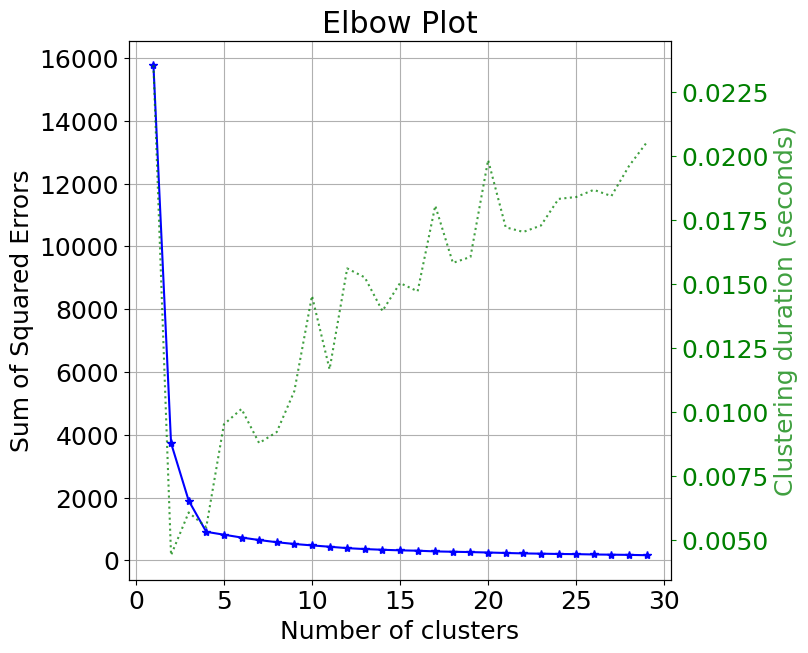

In [4]:
plot.elbow_curve(X, kmeans, n_clusters=range(1, 30))

##### Elbow curve from results

<AxesSubplot: title={'center': 'Elbow Plot'}, xlabel='Number of clusters', ylabel='Sum of Squared Errors'>

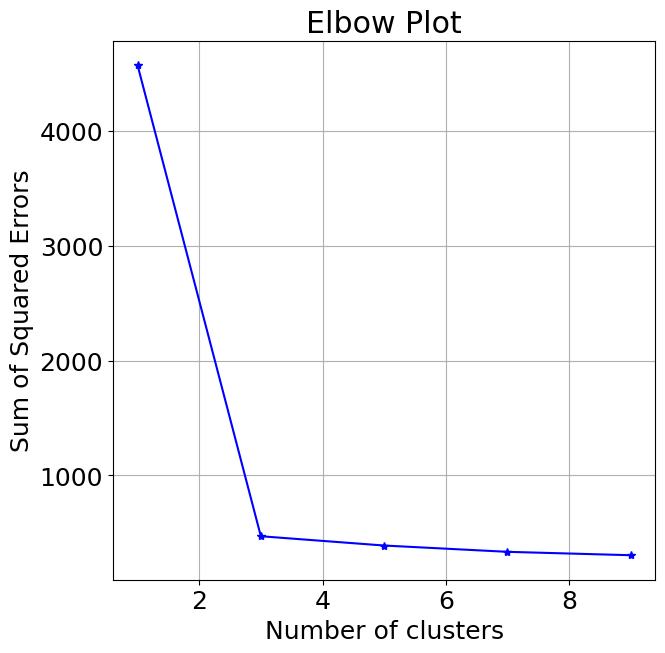

In [5]:
import numpy as np
n_clusters = range(1, 10, 2)
sum_of_squares = np.array([4572.2, 470.7, 389.9, 335.1, 305.5])
plot.elbow_curve_from_results(n_clusters, sum_of_squares, times=None)


##### Silhouette plot 

The below plot shows that n_clusters value of 3, 5 and 6 are a bad pick for the given data. One is likely to select between 2 and 4 n_clusters.

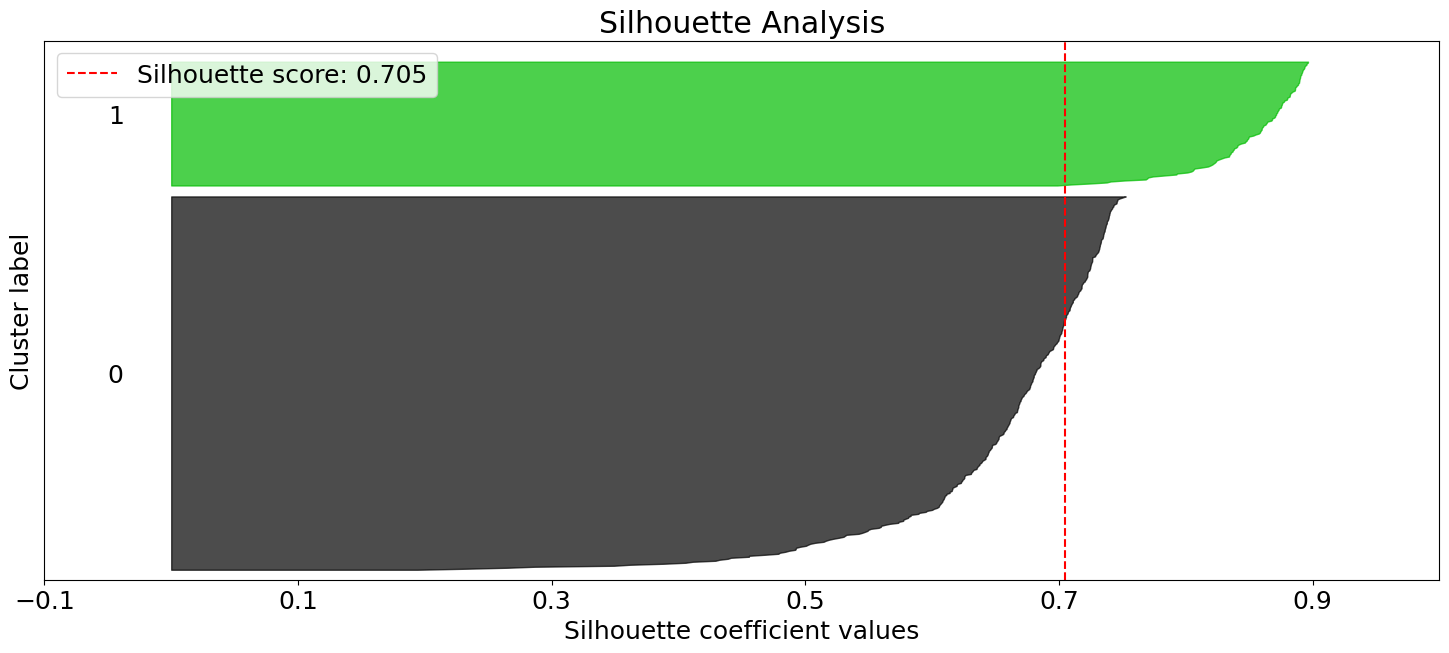

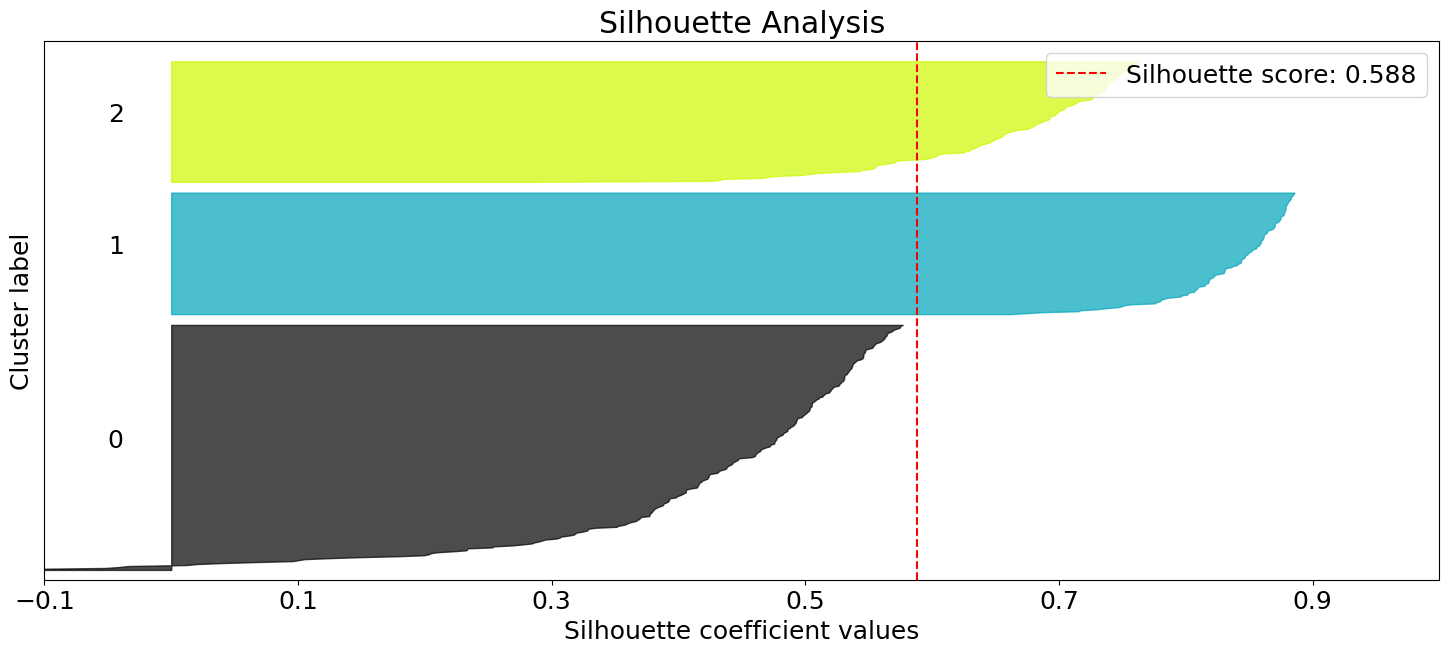

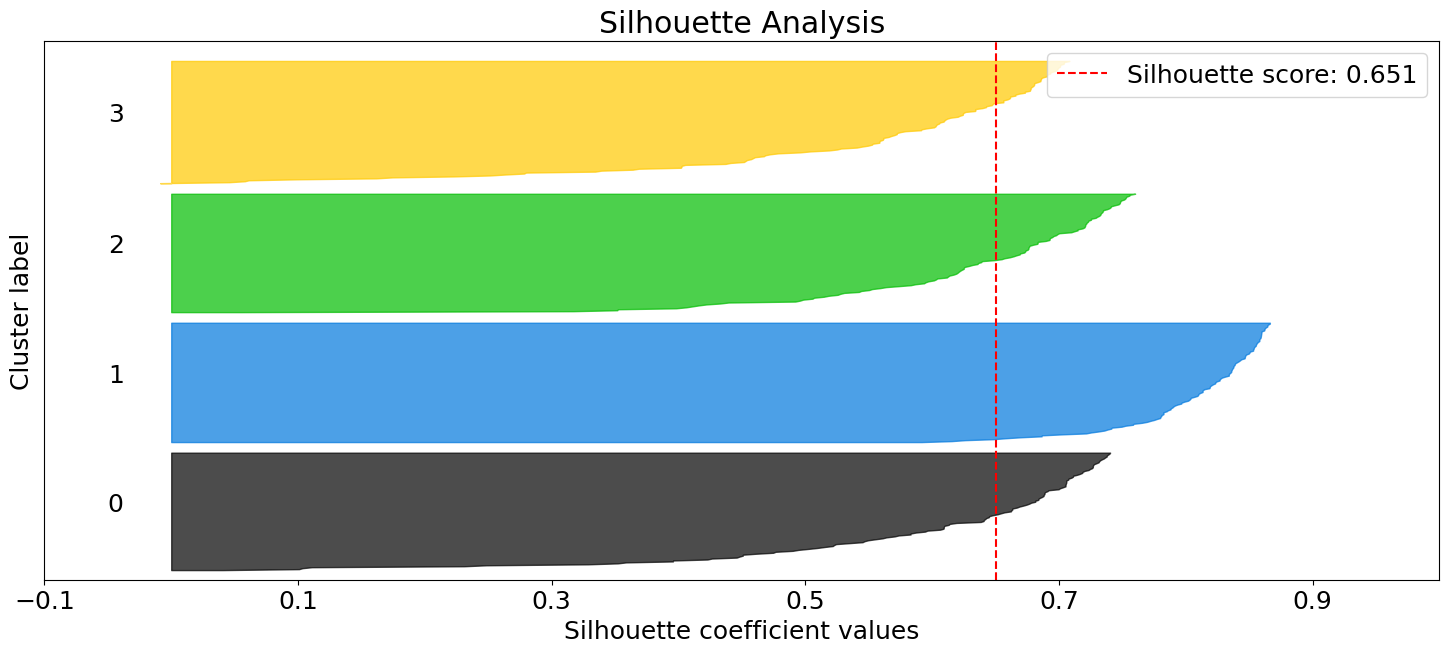

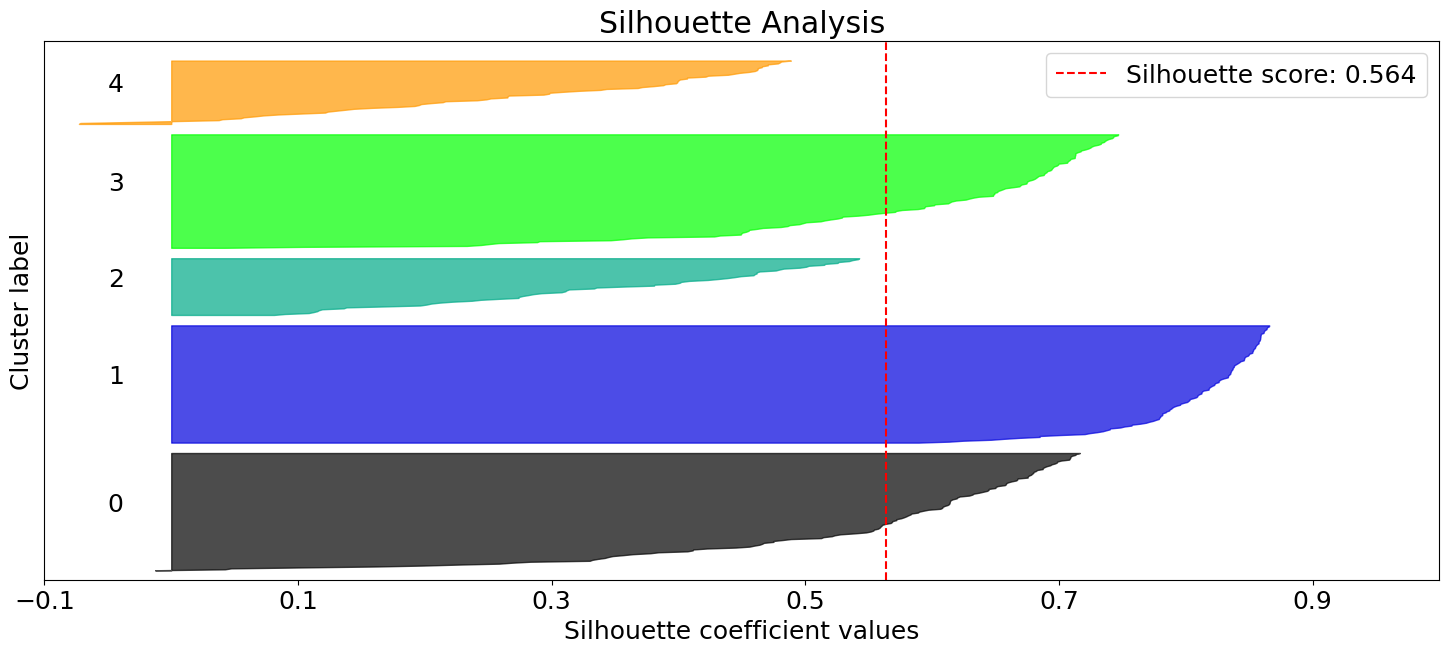

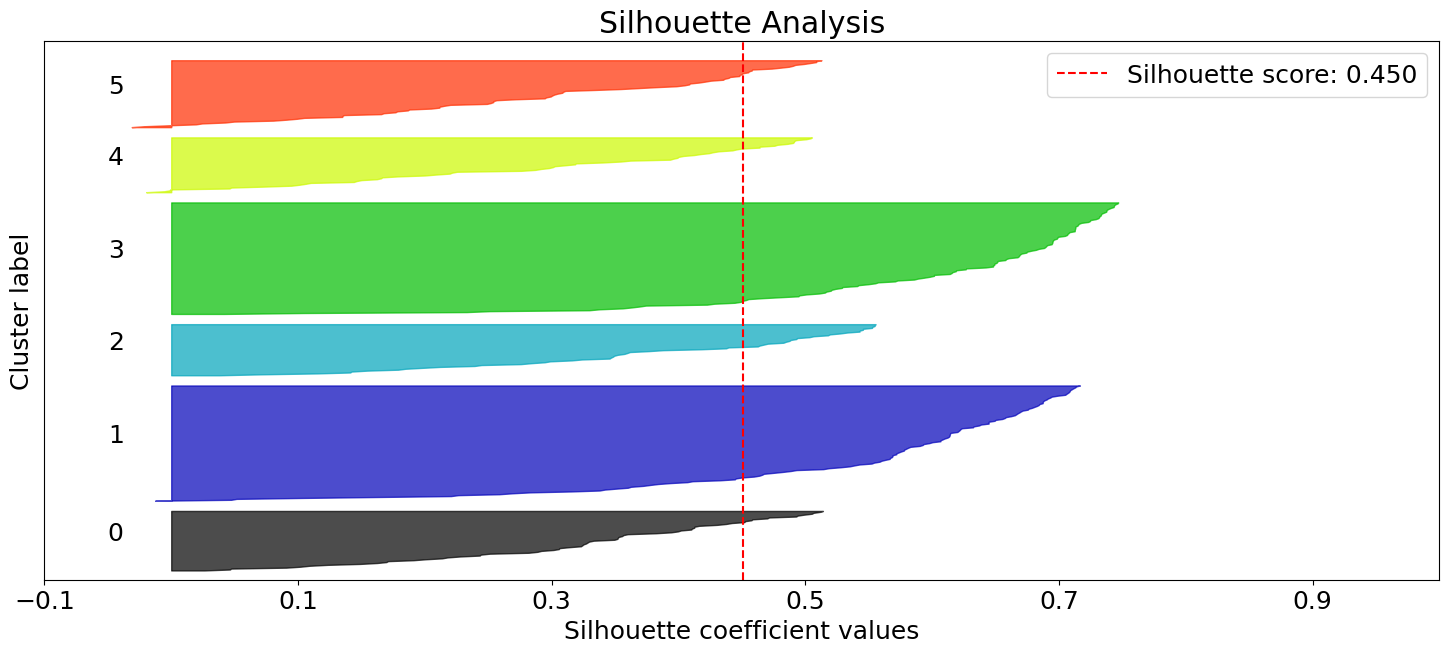

In [7]:
silhouette = plot.silhouette_analysis(X, kmeans)

##### Silhouette plot from cluster labels

In [9]:
X, y = datasets.make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)

kmeans = KMeans(n_clusters=4, random_state=1)
cluster_labels = kmeans.fit_predict(X)

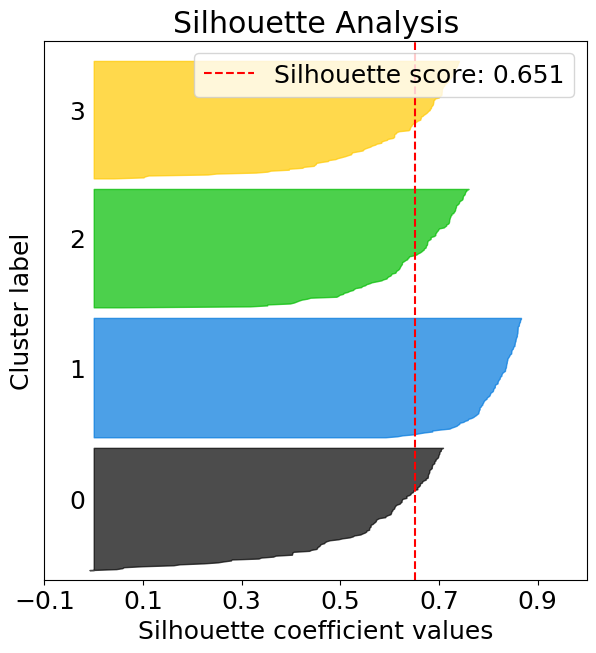

In [10]:
silhouette = plot.silhouette_analysis_from_results(X, cluster_labels)